### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head() #load first 5 rows to check we have correct data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head() #load first 5 rows to check we have correct data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train.shape

(1460, 81)

In [6]:
test.shape

(1459, 80)

We can confirm that we have the correct data loaded. The test data is less one column and that is the sales column has been removed since it is what we want to predict.

### EDA

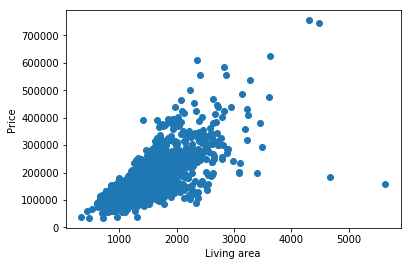

In [7]:
fig, ax =plt.subplots()
ax.scatter(x=train['GrLivArea'],y=train['SalePrice'])
ax.set_xlabel('Living area')
ax.set_ylabel('Price')
plt.show()

We notice a linear relationship between living area and price. We can also see two outliers, where the living area is huge but the price is very low. We filter out this outliers before we continue with analysis.

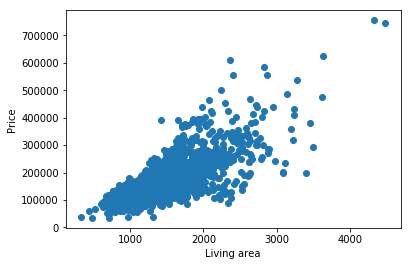

In [8]:
train = train.drop(train[(train['GrLivArea']>4500) & (train['SalePrice']<200000)].index)

#Run again to confirm there are no outliers
fig, ax =plt.subplots()
ax.scatter(x=train['GrLivArea'],y=train['SalePrice'])
ax.set_xlabel('Living area')
ax.set_ylabel('Price')
plt.show()

### Data Pre-processing

In [9]:
#separate target variables from independent variables
y_train = train['SalePrice'].values
train.drop('SalePrice',axis=1,inplace=True)

#combine train and test for preprocessing
Combined_data = pd.concat([train,test])
Combined_data.shape

(2917, 80)

#### Missing data

We check the columns with missing data so that we know how to handle them since models do not work well with missing values. We will input data based on several creteria, categorical features will be imputed using the modal class, numerical features with median and others will take 'None' values.

In [10]:
Combined_data.isna().sum() #we check if there are any NAs in the data

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

We notice some columns have NAs, we go ahead and check the percentage of Null values in those columns.

In [28]:
combined_NA = Combined_data.isna().sum()/len(Combined_data)*100
combined_NA = combined_NA[combined_NA!=0].sort_values()
len(combined_NA)

34

Some variables have very few missing values and hence we can replace them with mean, median or mode while some have very many missing values and thus we replace with None.

In [29]:
#fill missing values with None
Combined_data['PoolQC'] = Combined_data['PoolQC'].fillna('None')

In [30]:
#fill missing values with None
Combined_data['MiscFeature'] = Combined_data['MiscFeature'].fillna('None')

In [31]:
#fill missing values with None
Combined_data['Alley'] = Combined_data['Alley'].fillna('None')

In [32]:
#fill missing values with None
Combined_data['Fence'] = Combined_data['Fence'].fillna('None')

In [33]:
#fill missing values with None
Combined_data['FireplaceQu'] = Combined_data['FireplaceQu'].fillna('None')

In [34]:
#fill missing values with Median
Combined_data['LotFrontage'].fillna(Combined_data['LotFrontage'].median(),inplace=True)

In [35]:
#fill missing values with None
Combined_data['GarageFinish'] = Combined_data['GarageFinish'].fillna('None')

In [36]:
#fill missing values with None
Combined_data['GarageYrBlt'] = Combined_data['GarageYrBlt'].fillna('None')

In [37]:
#fill missing values with None
Combined_data['GarageQual'] = Combined_data['GarageQual'].fillna('None')

In [38]:
#fill missing values with None
Combined_data['GarageType'] = Combined_data['GarageType'].fillna('None')

In [39]:
#we first replace No with None and fill NA with none
Combined_data['BsmtExposure'].replace(('No'),'None',inplace=True)
Combined_data['BsmtExposure'].fillna('None',inplace=True)

In [40]:
#fill missing values with mode
Combined_data['BsmtCond'].fillna(Combined_data['BsmtCond'].mode()[0],inplace=True)

In [41]:
#fill missing values with None
Combined_data['BsmtQual'].fillna('None',inplace=True)

In [42]:
#fill missing values with mode
Combined_data['BsmtFinType2'].fillna(Combined_data['BsmtFinType2'].mode()[0],inplace=True)

In [43]:
#fill missing values with None
Combined_data['BsmtFinType1'].fillna('None',inplace=True)

In [44]:
#fill missing values with None
Combined_data['MasVnrType'].fillna('None',inplace=True)

In [45]:
#fill missing values with mode
Combined_data['MasVnrArea'].fillna(Combined_data['MasVnrArea'].mode()[0],inplace=True)

In [46]:
#fill missing values with mode
Combined_data['MSZoning'].fillna(Combined_data['MSZoning'].mode()[0],inplace=True)

In [47]:
Combined_data['BsmtFullBath'].fillna(Combined_data['BsmtFullBath'].mode()[0],inplace=True)

In [48]:
Combined_data['BsmtHalfBath'].fillna(Combined_data['BsmtHalfBath'].mode()[0],inplace=True)

In [49]:
Combined_data['GarageCond'].fillna(Combined_data['GarageCond'].mode()[0],inplace=True)

In [50]:
Combined_data['Functional'].fillna(Combined_data['Functional'].mode()[0],inplace=True)

In [51]:
Combined_data['SaleType'].fillna(Combined_data['SaleType'].mode()[0],inplace=True)

In [52]:
Combined_data['GarageArea'].fillna(Combined_data['GarageArea'].mode()[0],inplace=True)

In [53]:
Combined_data['GarageCars'].fillna(Combined_data['GarageCars'].mode()[0],inplace=True)

In [54]:
Combined_data['KitchenQual'].fillna(Combined_data['KitchenQual'].mode()[0],inplace=True)

In [55]:
Combined_data['Electrical'].fillna(Combined_data['Electrical'].mode()[0],inplace=True)

In [56]:
Combined_data['TotalBsmtSF'].fillna(Combined_data['TotalBsmtSF'].mode()[0],inplace=True)

In [57]:
Combined_data['BsmtUnfSF'].fillna(Combined_data['BsmtUnfSF'].mode()[0],inplace=True)

In [58]:
Combined_data['BsmtFinSF2'].fillna(Combined_data['BsmtFinSF2'].mode()[0],inplace=True)

In [59]:
Combined_data['BsmtFinSF1'].fillna(Combined_data['BsmtFinSF1'].mode()[0],inplace=True)

In [60]:
Combined_data['Exterior2nd'].fillna(Combined_data['Exterior2nd'].mode()[0],inplace=True)

In [61]:
Combined_data['Exterior1st'].fillna(Combined_data['Exterior1st'].mode()[0],inplace=True)

We drop some columns that are unique since they do not help in any way the model

In [64]:
Combined_data.drop(['Id','Utilities'],axis=1,inplace=True)

### Feature Engineering

We notice that we have several categorical variables in our data and we need to transform them to numerical so that the model can understand how to handle them.  We use label encoding 

In [65]:
#filter out categorical variables
cat_feats = Combined_data.dtypes[Combined_data.dtypes == 'object'].index

#Apply one-hot-encoding to the categorical features
Combined_data_new = pd.get_dummies(Combined_data,columns=cat_feats)

#check the size of the new dataset
Combined_data_new.shape

(2919, 399)

In [66]:
# separate the train and test data

x_train = Combined_data_new.iloc[:train.shape[0]]
x_test = Combined_data_new.iloc[train.shape[0]:]

In [67]:
x_test.shape

(1459, 399)

### Model Building

We build several models, get the predictions from each of them and take the average of all

In [147]:
# build lightgbm model
import lightgbm as lgb

lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

lgb.fit(x_train, y_train)
lgb_predictions = lgb.predict(x_test)

In [148]:
np.mean(lgb_predictions)

178919.75838538067

In [149]:
# build gradient boosing regressor
from sklearn.ensemble import GradientBoostingRegressor

GBr = GradientBoostingRegressor(n_estimators=2500, learning_rate=0.05,
                                   max_depth=6, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=20, 
                                   loss='huber', random_state =101)
# Predict
GBr.fit(x_train, y_train)
GBr_predictions = GBr.predict(x_test)

In [150]:
np.mean(GBr_predictions)

178378.24895446573

In [151]:
#Building a random Forest regressor
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=3000,n_jobs=-1, random_state=101,
                            min_samples_leaf=6,min_samples_split=20,
                            max_features='sqrt')
#predict
rfr.fit(x_train,y_train)
rfr_predictions = rfr.predict(x_test)

In [152]:
np.mean(rfr_predictions)

179673.48797163262

In [153]:
#Buld XgBoost
import xgboost as xgb

xgb = xgb.XGBRegressor(colsample_bytree=0.5, gamma=0.05, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2500,
                             reg_alpha=0.5, reg_lambda=0.9,
                             subsample=0.5, silent=1,
                             random_state =101, nthread = -1)

#predict
xgb.fit(x_train,y_train)
xgb_predictions = xgb.predict(x_test)

In [154]:
np.mean(xgb_predictions)

179463.34

In [172]:
# Combining all the predictions from the different models
combined_predictions = (lgb_predictions+GBr_predictions+rfr_predictions+xgb_predictions)/4

In [173]:
np.mean(combined_predictions)

179108.71139386637

In [180]:
#export the predicted values into a csv file
Final_predictions = pd.DataFrame({'Id': test['Id'],'SalePrice': combined_predictions})
Final_predictions.to_csv('Submissions',index=False)